In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from mnist import MNIST
mndata = MNIST('gzip')
mndata.select_emnist('mnist')


In [17]:
images, labels = mndata.load_training()
testX, testY = mndata.load_testing()
images = np.array(images)
labels = np.array(labels)
testX = np.array(testX)
testY= np.array(testY)


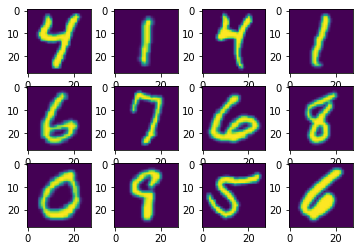

In [21]:
p = np.reshape(images, newshape=( 60000, 28,28))
for i in range(12):
    plt.subplot(3,4,i+1)
    plt.imshow(p[i,::])


In [65]:
p[1, ::].shape

(28, 28)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


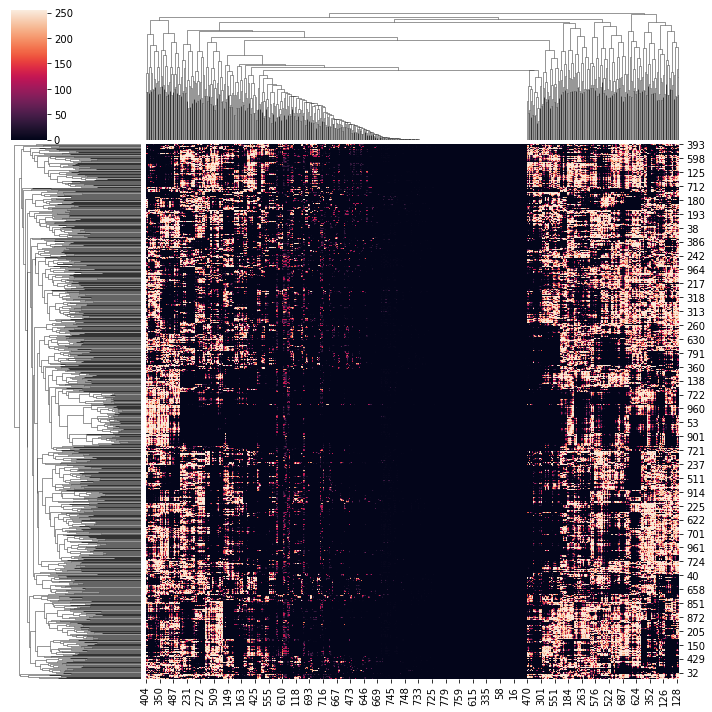

In [37]:
import seaborn as sb
sample = images[0:10000, :]
clustermap = sb.clustermap(sample[0:1000,:])

In [38]:
sample.shape

(10000, 784)

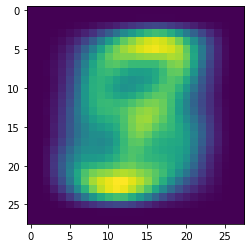

In [25]:
plt.imshow(np.array(clustermap.data.sum(axis=0)).reshape((28,28)))

In [33]:
nums = {}
for i in range(len(images)):
    if labels[i] in nums:
        nums[labels[i]].append(images[i])
    else:
        nums[labels[i]] = [images[i]]


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


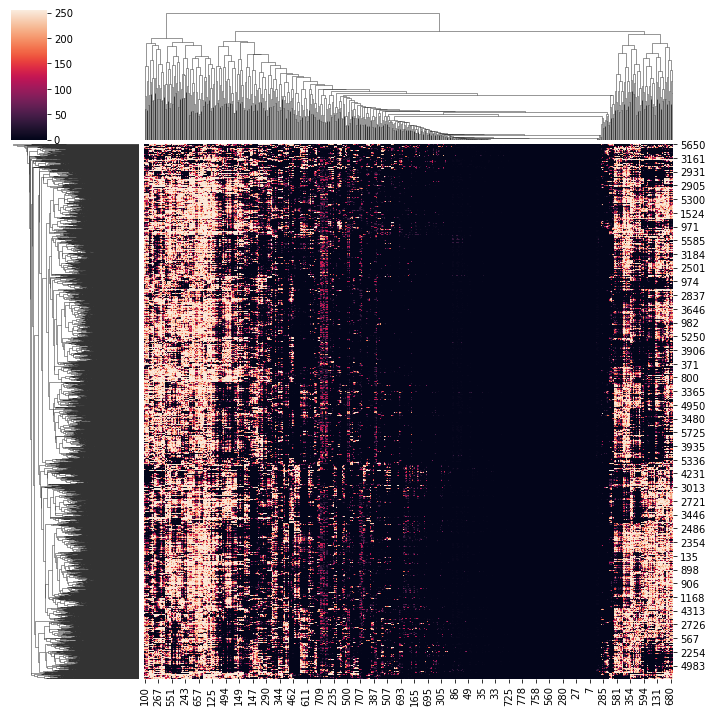

In [40]:
n3 = np.asarray(nums[3])
clustermap = sb.clustermap(n3)

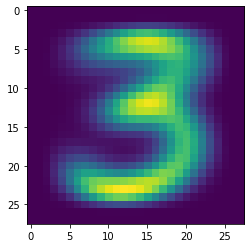

In [41]:
plt.imshow(np.array(clustermap.data.sum(axis=0)).reshape((28,28)))

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


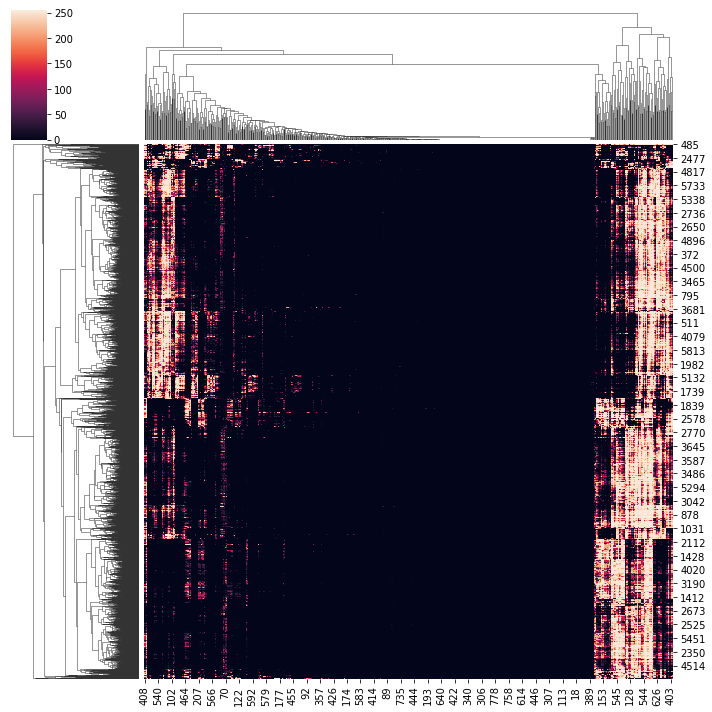

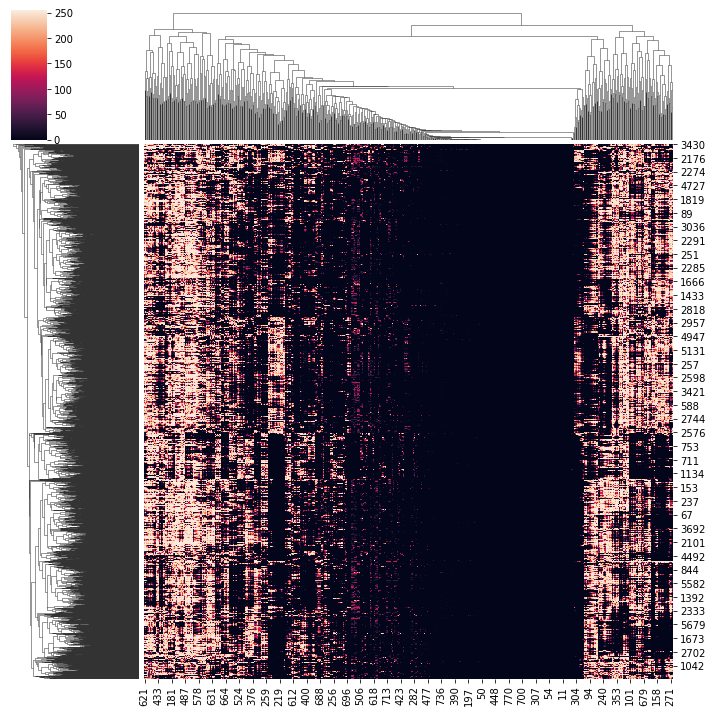

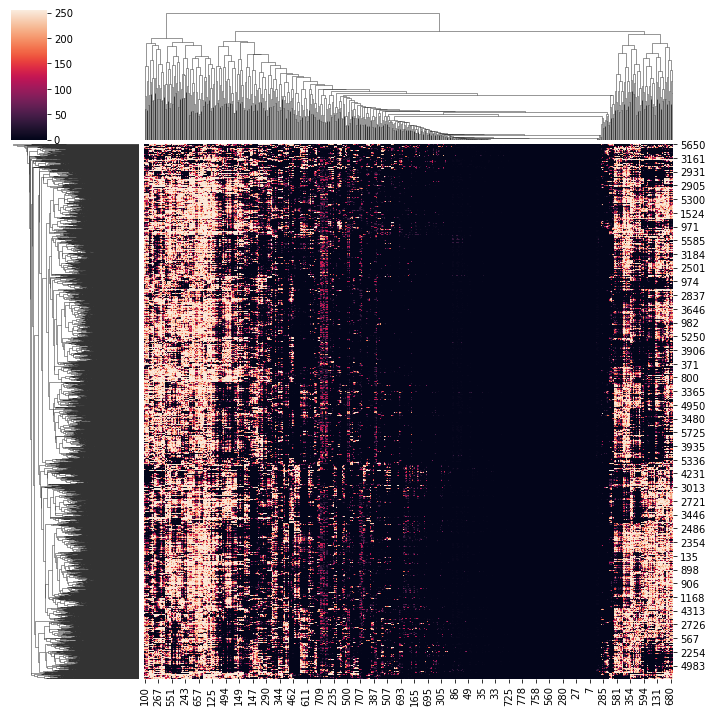

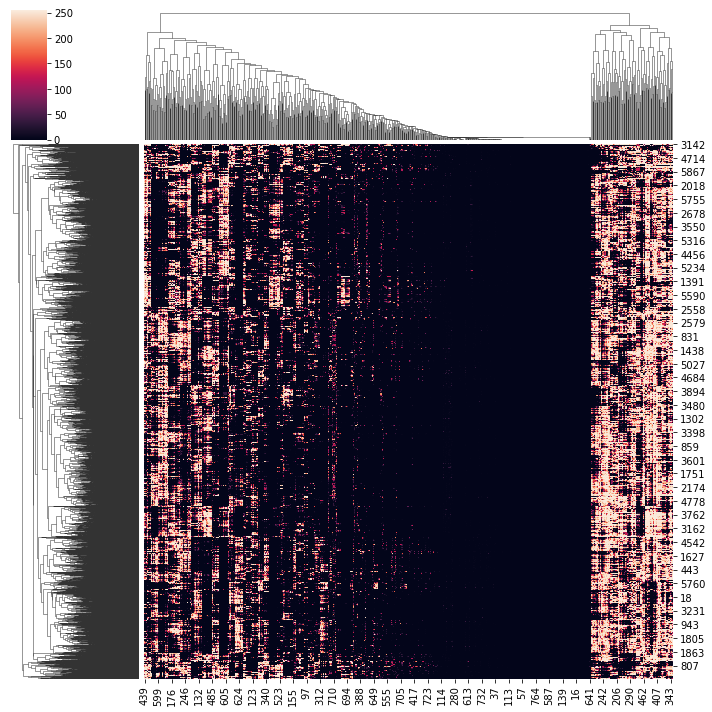

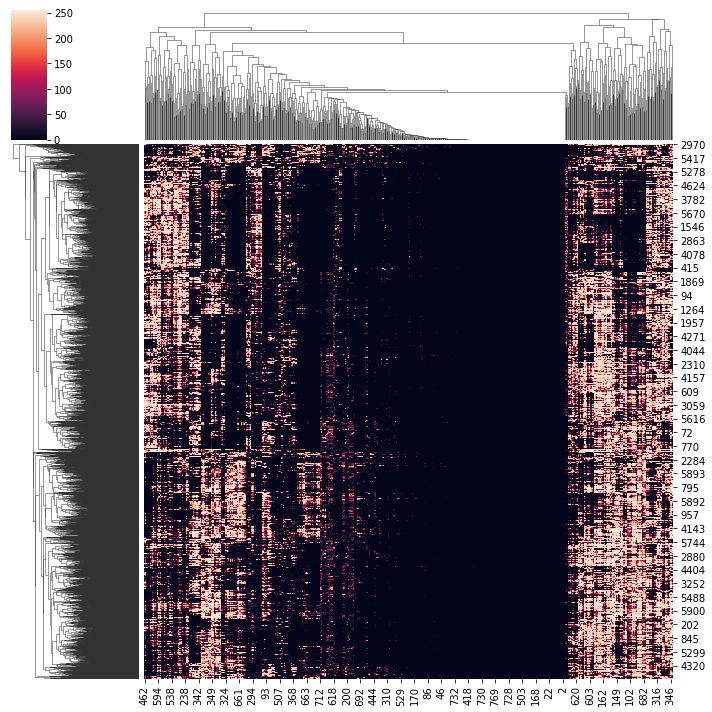

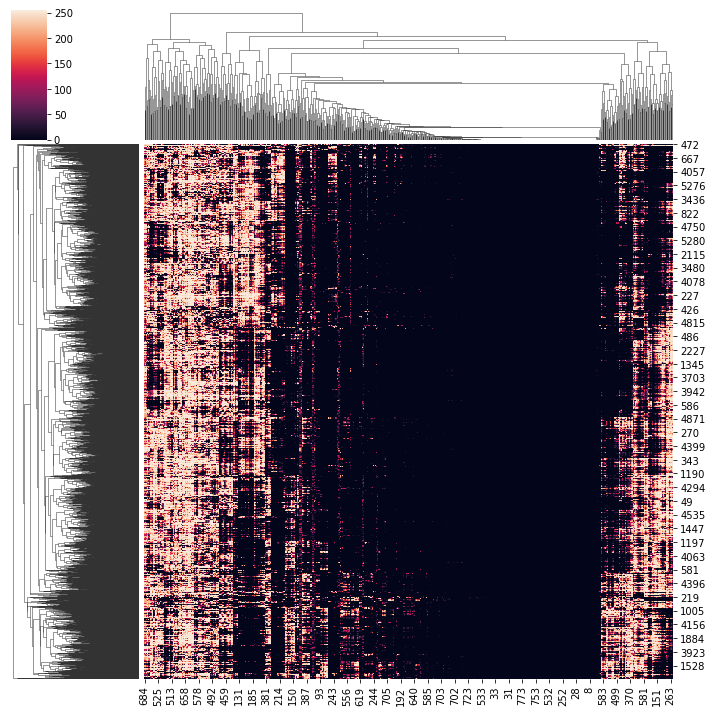

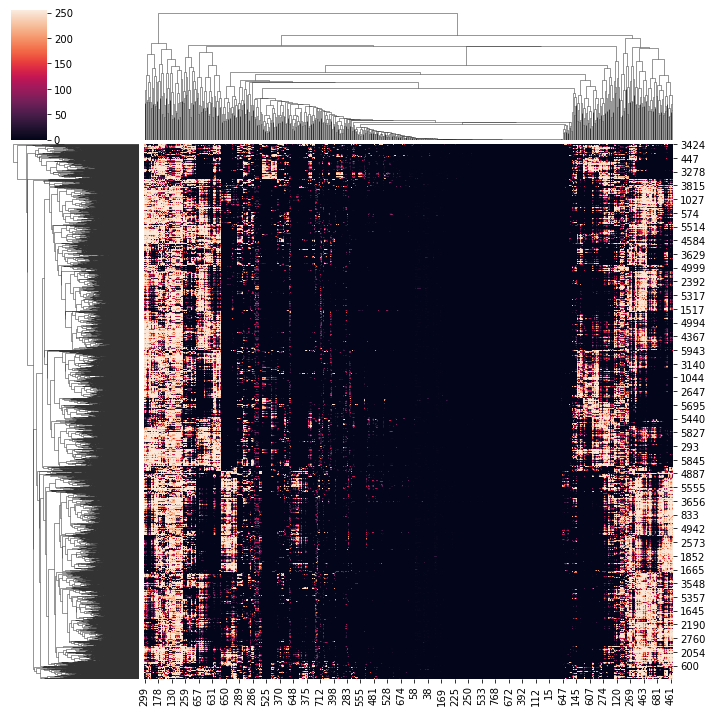

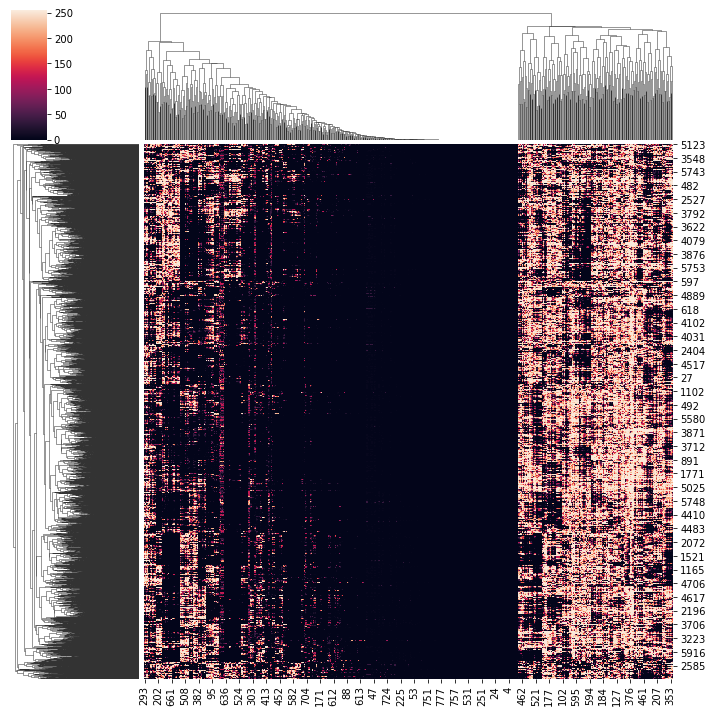

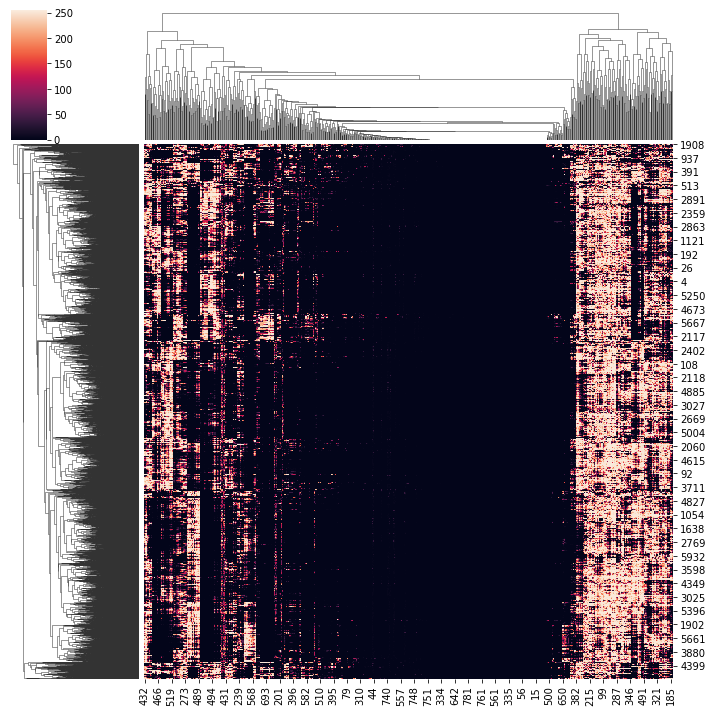

In [45]:
n1 = np.asarray(nums[1])
n2 = np.asarray(nums[2])
n3 = np.asarray(nums[3])
n4 = np.asarray(nums[4])
n5 = np.asarray(nums[5])
n6 = np.asarray(nums[6])
n7 = np.asarray(nums[7])
n8 = np.asarray(nums[8])
n9 = np.asarray(nums[9])
clustermap1 = sb.clustermap(n1)
clustermap2 = sb.clustermap(n2)
clustermap3 = sb.clustermap(n3)
clustermap4 = sb.clustermap(n4)
clustermap5 = sb.clustermap(n5)
clustermap6 = sb.clustermap(n6)
clustermap7 = sb.clustermap(n7)
clustermap8 = sb.clustermap(n8)
clustermap9 = sb.clustermap(n9)


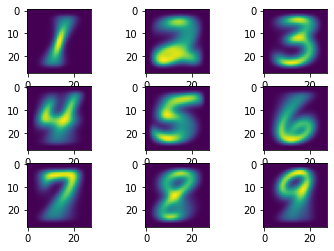

In [144]:
clustermaps = [clustermap1, clustermap2, clustermap3, clustermap4, clustermap5, clustermap6, clustermap7, clustermap8, clustermap9]
plt.subplot(331)
for i in range(len(clustermaps)):
    plt.subplot(3, 3, i+1)
    plt.imshow(np.array(clustermaps[i].data.sum(axis=0)).reshape((28,28)))

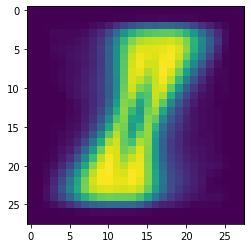

In [67]:
n1 = np.reshape(n1, newshape=(6000, 28, 28))
n1s = np.std(n1, axis=0)
n1s.shape
plt.imshow(n1s)

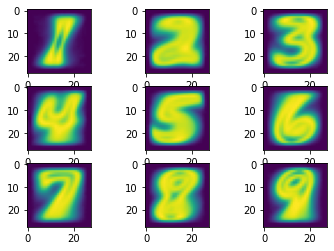

In [70]:
n = [n1, n2, n3, n4, n5, n6, n7, n8, n9]
#plt.subplots(331)
for i in range(len(n)):
    plt.subplot(3, 3, i+1)
    n[i] = np.reshape(n[i], newshape=(6000, 28, 28))
    ns = np.std(n[i], axis=0)
    plt.imshow(ns)


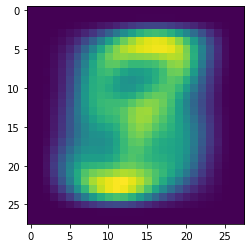

In [76]:
sample = images[:2000]
sample = np.reshape(sample, newshape=(2000, 28, 28))
avg = np.mean(sample, axis=0)
plt.imshow(avg)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


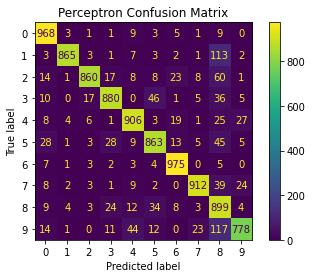

In [146]:
from sklearn.linear_model import Perceptron 
clf = Perceptron()
clf.fit(images, labels)
plot_confusion_matrix(clf, testX, testY)
plt.title('Perceptron Confusion Matrix')
plt.show()

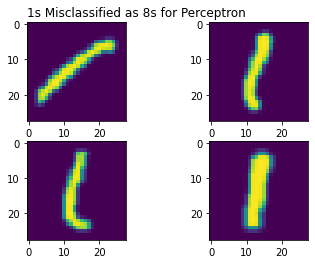

In [166]:
pred = clf.predict(testX)
i = 0
wrong = []
diff = []
while len(wrong) < 4:
    if pred[i] == 8 and testY[i]==1:
        wrong.append(testX[i])
        diff.append((pred[i], testY[i]))
    i+=1
wrong = np.asarray(wrong)
wrong = wrong.reshape(4, 28, 28)
plt.subplot(221)
plt.title('1s Misclassified as 8s for Perceptron', loc='left')
for i in range(len(wrong)):
    plt.subplot(2, 2, i+1)
    plt.imshow(wrong[i, ::])

In [147]:
from sklearn.neural_network import MLPClassifier
classifier = MLPClassifier(hidden_layer_sizes=(100,))
classifier.fit(images, labels)

MLPClassifier()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


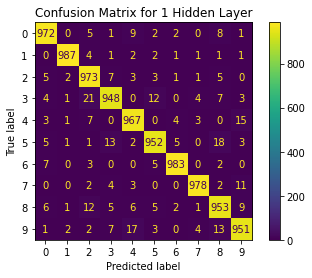

In [149]:

from sklearn.metrics import plot_confusion_matrix
y_pred = classifier.predict(testX)
plot_confusion_matrix(classifier, testX, testY)
plt.title('Confusion Matrix for 1 Hidden Layer')
plt.show()



In [133]:
y_pred[100:110]

array([5, 2, 2, 5, 8, 0, 8, 3, 5, 2], dtype=uint8)

In [155]:

i = 0
wrong = []
diff = []
while len(wrong) < 4:
    if y_pred[i] == 2 and testY[i]==3:
        wrong.append(testX[i])
        diff.append((y_pred[i], testY[i]))
    i+=1




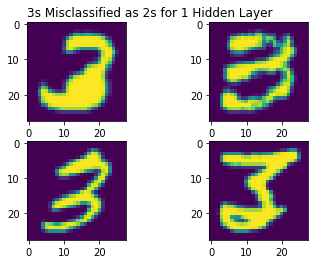

In [163]:

wrong = np.asarray(wrong)
wrong = wrong.reshape(4, 28, 28)
plt.subplot(221)
plt.title('3s Misclassified as 2s for 1 Hidden Layer', loc='left')
for i in range(len(wrong)):
    plt.subplot(2, 2, i+1)
    plt.imshow(wrong[i, ::])

    

In [150]:
classifier2 = MLPClassifier(hidden_layer_sizes=(150, 100, 50))
classifier2.fit(images, labels)

MLPClassifier(hidden_layer_sizes=(150, 100, 50))

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


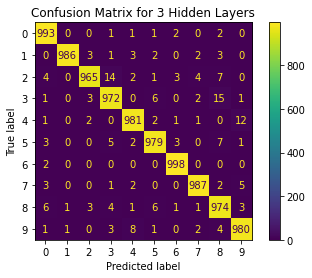

In [152]:
y_pred = classifier2.predict(testX)
plot_confusion_matrix(classifier2, testX, testY)
plt.title('Confusion Matrix for 3 Hidden Layers')
plt.show()

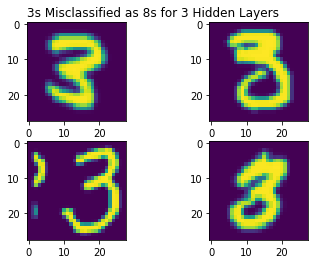

In [175]:
pred = classifier2.predict(testX)
i = 0
wrong = []
diff = []
while len(wrong) < 4:
    if pred[i] == 8 and testY[i]==3:
        wrong.append(testX[i])
        diff.append((pred[i], testY[i]))
    i+=1
wrong = np.asarray(wrong)
wrong = wrong.reshape(4, 28, 28)
plt.subplot(221)
plt.title('3s Misclassified as 8s for 3 Hidden Layers', loc='left')
for i in range(len(wrong)):
    plt.subplot(2, 2, i+1)
    plt.imshow(wrong[i, ::])

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


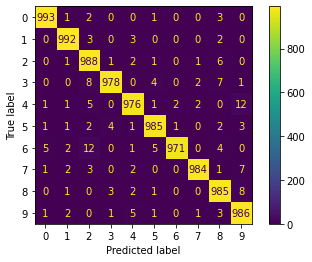

In [91]:
y_pred = classifier.predict(testX)
plot_confusion_matrix(classifier4, testX, testY)
plt.show()

In [93]:
from sklearn.metrics import accuracy_score
y_pred1 = classifier.predict(testX)
y_pred2 = classifier2.predict(testX)
print(accuracy_score(testY, y_pred1))
print(accuracy_score(testY, y_pred2))


0.9712
0.9808
0.9838


In [106]:
nums_test = {}
for i in range(len(testX)):
    if testY[i] in nums_test:
        nums_test[testY[i]].append(testX[i])
    else:
        nums_test[testY[i]] = [testX[i]]

In [110]:
accuracies = {}
for i in range(10):
    for j in range(10):
        if i != j and (i,j) not in accuracies and (j,i) not in accuracies:
            nx = np.concatenate((np.asarray(nums_test[i]), np.asarray(nums_test[j])))
            ny = np.concatenate((np.asarray([i]*len(nums_test[i])), np.asarray([j]*len(nums_test[j]))))
            y_pred = classifier4.predict(nx)
            accuracies[(i,j)] = accuracy_score(ny, y_pred)


In [111]:
min(accuracies, key=accuracies.get)

(4, 6)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


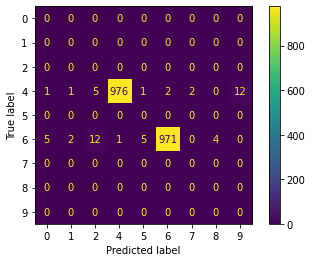

In [112]:
x = np.concatenate((np.asarray(nums_test[4]), np.asarray(nums_test[6])))
y = np.concatenate((np.asarray([4]*len(nums_test[4])), np.asarray([6]*len(nums_test[6]))))
plot_confusion_matrix(classifier4, x, y)

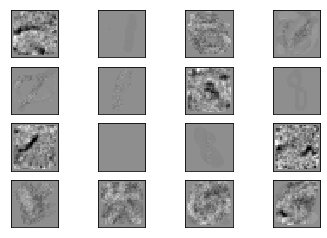

In [174]:

fig, axes = plt.subplots(4, 4)
vmin, vmax = classifier.coefs_[0].min(), classifier.coefs_[0].max()
for coef, ax in zip(classifier.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=0.5 * vmin, vmax=0.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())